Epoch 1/50
2/2 [==============================] - 0s 117ms/step - loss: 1.5373 - accuracy: 0.1892 - val_loss: 1.4119 - val_accuracy: 0.1000
Epoch 2/50
2/2 [==============================] - 0s 29ms/step - loss: 1.4508 - accuracy: 0.1892 - val_loss: 1.3597 - val_accuracy: 0.1000
Epoch 3/50
2/2 [==============================] - 0s 12ms/step - loss: 1.3778 - accuracy: 0.2162 - val_loss: 1.3110 - val_accuracy: 0.1000
Epoch 4/50
2/2 [==============================] - 0s 22ms/step - loss: 1.3120 - accuracy: 0.2162 - val_loss: 1.2643 - val_accuracy: 0.1000
Epoch 5/50
2/2 [==============================] - 0s 19ms/step - loss: 1.2451 - accuracy: 0.2162 - val_loss: 1.2194 - val_accuracy: 0.1000
Epoch 6/50
2/2 [==============================] - 0s 34ms/step - loss: 1.1822 - accuracy: 0.2162 - val_loss: 1.1766 - val_accuracy: 0.1000
Epoch 7/50
2/2 [==============================] - 0s 16ms/step - loss: 1.1192 - accuracy: 0.2162 - val_loss: 1.1358 - val_accuracy: 0.1000
Epoch 8/50
2/2 [==========

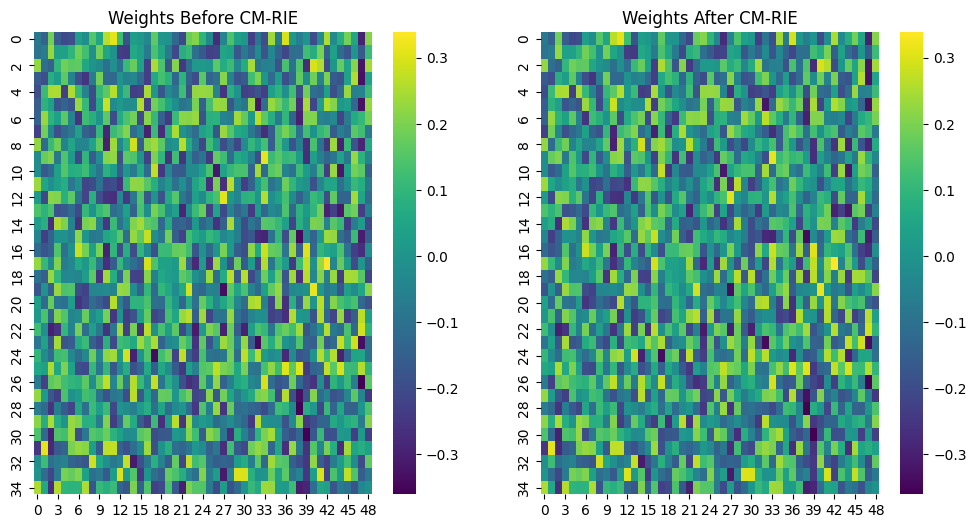

2/2 [==============================] - 0s 21ms/step - loss: 0.2476 - accuracy: 1.0000
Loss after removal: 0.24764710664749146, Accuracy after removal: 1.0


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/risk_factors_cervical_cancer.csv')

# Preprocess the dataset
df = df.replace('?', np.nan)
df = df.dropna()

# Convert target column to binary classification
X = df.drop(columns=['Biopsy']).values
y = df['Biopsy'].values
y = tf.keras.utils.to_categorical(y, num_classes=2)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(49, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer
model.add(Dense(2, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model before removing irrelevant edges
loss_before, accuracy_before = model.evaluate(X_train, y_train)
print(f"Loss before removal: {loss_before}, Accuracy before removal: {accuracy_before}")

# Function to apply CM-RIE algorithm to remove irrelevant edges
def cm_rie(weights, class_label):
    tempD = []
    tempCount = 0
    D = weights.copy()

    for i in range(len(D)):
        temp1 = []
        temp2 = []
        if D[i][class_label] == 0:
            for j in range(len(D[i])):
                if j != class_label:
                    if D[i][j] != 0:
                        temp1.append(D[i][j])
                        temp2.append(j)
            if class_label == 0:
                D[i][1] = np.mean(temp1) if temp1 else 0
            else:
                D[i][0] = np.mean(temp1) if temp1 else 0
            for k in temp2:
                D[i][k] = 0
            tempD.append(i)

    if class_label == 0:
        negative_node = 1
    else:
        negative_node = 0

    if len(tempD) > 1:
        for i in tempD:
            if class_label == 0:
                tempCount += D[i][1]
            else:
                tempCount += D[i][0]

        D[tempD[0]][negative_node] = np.mean(tempCount) if tempD else 0
        for x in tempD[1:]:
            D[x][negative_node] = 0

        for i in range(len(D)):
            tempDL = []
            for j in tempD:
                tempDL.append(D[i][j])
            D[i][tempD[0]] = np.mean(tempDL) if tempDL else 0

        for x in tempD[1:]:
            for y in range(len(D)):
                D[y][x] = 0

    return D

# Retrieve weights from the trained model
weights = model.get_weights()

# Visualize weights before applying CM-RIE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(weights[0], cmap='viridis')
plt.title('Weights Before CM-RIE')

# Apply CM-RIE algorithm to the first layer's weights (hidden layer)
updated_weights = cm_rie(weights[0], 0)

# Visualize weights after applying CM-RIE
plt.subplot(1, 2, 2)
sns.heatmap(updated_weights, cmap='viridis')
plt.title('Weights After CM-RIE')

plt.show()

# Update the model's weights
weights[0] = updated_weights
model.set_weights(weights)

# Evaluate the model after removing irrelevant edges
loss_after, accuracy_after = model.evaluate(X_train, y_train)
print(f"Loss after removal: {loss_after}, Accuracy after removal: {accuracy_after}")


Epoch 1/50
2/2 [==============================] - 0s 156ms/step - loss: 0.9839 - accuracy: 0.3243 - val_loss: 0.9774 - val_accuracy: 0.2000
Epoch 2/50
2/2 [==============================] - 0s 55ms/step - loss: 0.9196 - accuracy: 0.3514 - val_loss: 0.9441 - val_accuracy: 0.3000
Epoch 3/50
2/2 [==============================] - 0s 56ms/step - loss: 0.8604 - accuracy: 0.4595 - val_loss: 0.9153 - val_accuracy: 0.3000
Epoch 4/50
2/2 [==============================] - 0s 98ms/step - loss: 0.8148 - accuracy: 0.5135 - val_loss: 0.8860 - val_accuracy: 0.3000
Epoch 5/50
2/2 [==============================] - 0s 22ms/step - loss: 0.7715 - accuracy: 0.5405 - val_loss: 0.8585 - val_accuracy: 0.3000
Epoch 6/50
2/2 [==============================] - 0s 25ms/step - loss: 0.7292 - accuracy: 0.5405 - val_loss: 0.8333 - val_accuracy: 0.3000
Epoch 7/50
2/2 [==============================] - 0s 43ms/step - loss: 0.6917 - accuracy: 0.5676 - val_loss: 0.8091 - val_accuracy: 0.4000
Epoch 8/50
2/2 [==========

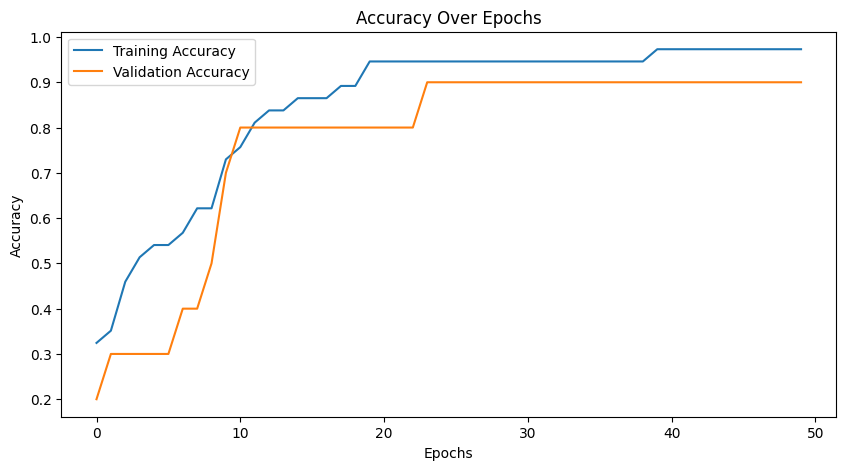

2/2 [==============================] - 0s 13ms/step - loss: 0.2028 - accuracy: 0.9574
Loss before removal: 0.20277461409568787, Accuracy before removal: 0.957446813583374


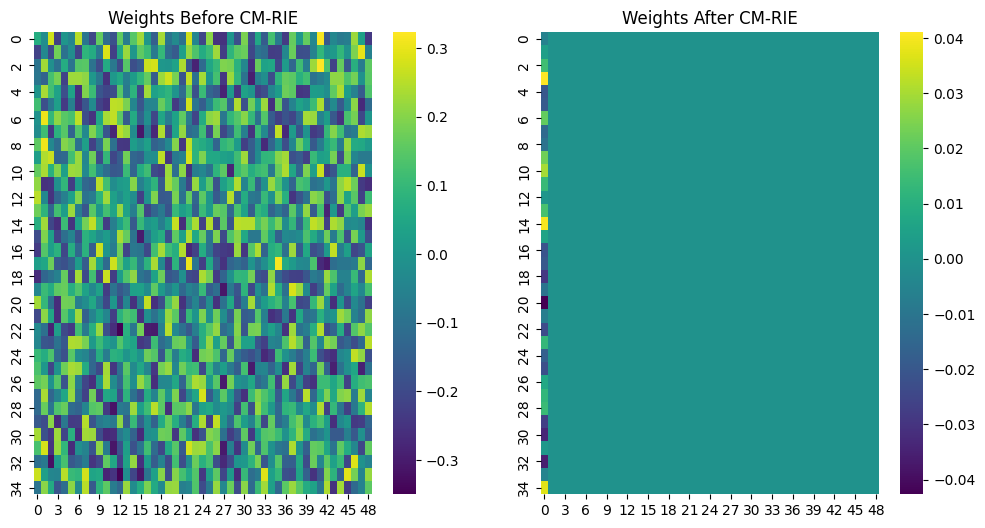

2/2 [==============================] - 0s 3ms/step - loss: 0.5705 - accuracy: 0.8298
Loss after removal: 0.5704720616340637, Accuracy after removal: 0.8297872543334961


In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/risk_factors_cervical_cancer.csv')

# Preprocess the dataset
df = df.replace('?', np.nan)
df = df.dropna()

# Convert target column to binary classification
X = df.drop(columns=['Biopsy']).values
y = df['Biopsy'].values
y = tf.keras.utils.to_categorical(y, num_classes=2)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(49, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer
model.add(Dense(2, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

# Evaluate the model before removing irrelevant edges
loss_before, accuracy_before = model.evaluate(X_train, y_train)
print(f"Loss before removal: {loss_before}, Accuracy before removal: {accuracy_before}")

# Function to apply CM-RIE algorithm to remove irrelevant edges
def cm_rie(weights):
    D = weights.copy()
    for i in range(D.shape[0]):
        non_zero_indices = np.nonzero(D[i])[0]
        if len(non_zero_indices) > 0:
            mean_value = np.mean(D[i, non_zero_indices])
            D[i, non_zero_indices] = 0  # Set irrelevant edges to zero
            if mean_value != 0:
                D[i, non_zero_indices[0]] = mean_value  # Retain the mean value in one of the connections for stability

    return D

# Retrieve weights from the trained model
weights = model.get_weights()

# Visualize weights before applying CM-RIE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(weights[0], cmap='viridis')
plt.title('Weights Before CM-RIE')

# Apply CM-RIE algorithm to the first layer's weights (hidden layer)
updated_weights = cm_rie(weights[0])

# Visualize weights after applying CM-RIE
plt.subplot(1, 2, 2)
sns.heatmap(updated_weights, cmap='viridis')
plt.title('Weights After CM-RIE')

plt.show()

# Update the model's weights
weights[0] = updated_weights
model.set_weights(weights)

# Evaluate the model after removing irrelevant edges
loss_after, accuracy_after = model.evaluate(X_train, y_train)
print(f"Loss after removal: {loss_after}, Accuracy after removal: {accuracy_after}")


Epoch 1/50
2/2 [==============================] - 0s 95ms/step - loss: 0.8525 - accuracy: 0.5135 - val_loss: 0.8110 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 0s 16ms/step - loss: 0.8021 - accuracy: 0.5405 - val_loss: 0.7659 - val_accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 0s 14ms/step - loss: 0.7586 - accuracy: 0.6216 - val_loss: 0.7291 - val_accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 0s 20ms/step - loss: 0.7201 - accuracy: 0.6216 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 0s 15ms/step - loss: 0.6853 - accuracy: 0.6216 - val_loss: 0.6584 - val_accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 0s 15ms/step - loss: 0.6530 - accuracy: 0.6486 - val_loss: 0.6252 - val_accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 0s 37ms/step - loss: 0.6203 - accuracy: 0.6757 - val_loss: 0.5937 - val_accuracy: 0.5000
Epoch 8/50
2/2 [===========

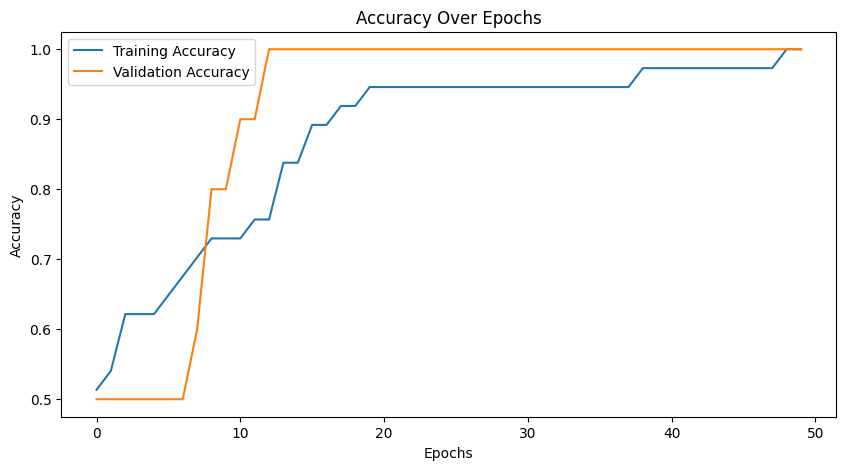

2/2 [==============================] - 0s 15ms/step - loss: 0.1272 - accuracy: 1.0000
Loss before removal: 0.12721219658851624, Accuracy before removal: 1.0
1/1 [==============================] - 0s 142ms/step
Inference time before removal: 0.22120094299316406 seconds


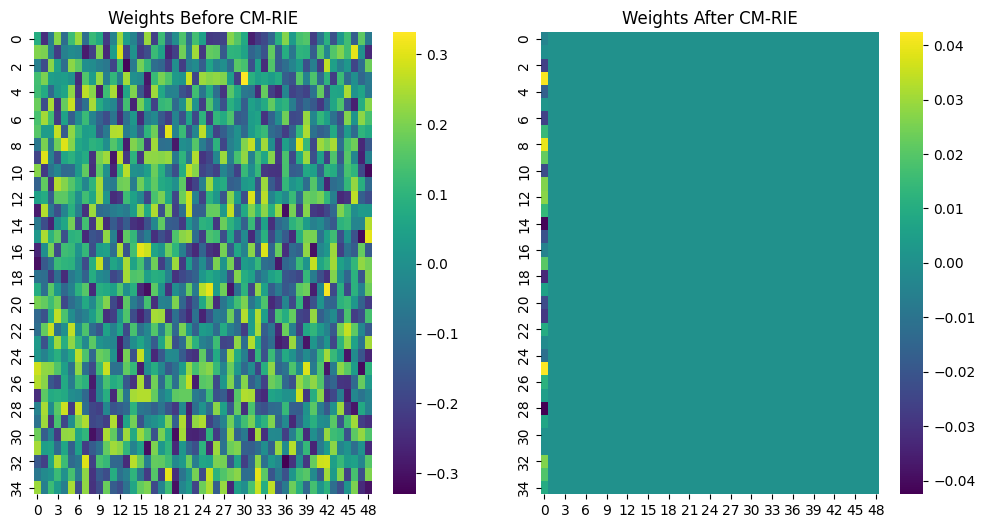

Jaccard similarity index: 0.09871244635193133
2/2 [==============================] - 0s 4ms/step - loss: 0.5719 - accuracy: 0.8298
Loss after removal: 0.5718608498573303, Accuracy after removal: 0.8297872543334961
1/1 [==============================] - 0s 10ms/step
Inference time after removal: 0.06473112106323242 seconds


In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import jaccard_score
import time

# Load the dataset
df = pd.read_csv('../data/risk_factors_cervical_cancer.csv')

# Preprocess the dataset
df = df.replace('?', np.nan)
df = df.dropna()

# Convert target column to binary classification
X = df.drop(columns=['Biopsy']).values
y = df['Biopsy'].values
y = tf.keras.utils.to_categorical(y, num_classes=2)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(49, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer
model.add(Dense(2, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

# Evaluate the model before removing irrelevant edges
loss_before, accuracy_before = model.evaluate(X_train, y_train)
print(f"Loss before removal: {loss_before}, Accuracy before removal: {accuracy_before}")

# Measure inference time for the original model
start_time = time.time()
model.predict(X_test)
inference_time_before = time.time() - start_time
print(f"Inference time before removal: {inference_time_before} seconds")

# Function to apply CM-RIE algorithm to remove irrelevant edges
def cm_rie(weights):
    D = weights.copy()
    for i in range(D.shape[0]):
        non_zero_indices = np.nonzero(D[i])[0]
        if len(non_zero_indices) > 0:
            mean_value = np.mean(D[i, non_zero_indices])
            D[i, non_zero_indices] = 0  # Set irrelevant edges to zero
            if mean_value != 0:
                D[i, non_zero_indices[0]] = mean_value  # Retain the mean value in one of the connections for stability

    return D

# Retrieve weights from the trained model
weights = model.get_weights()

# Save original weights and biases as 1D arrays
original_weights_flat = np.concatenate([w.flatten() for w in weights])

# Visualize weights before applying CM-RIE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(weights[0], cmap='viridis')
plt.title('Weights Before CM-RIE')

# Apply CM-RIE algorithm to the first layer's weights (hidden layer)
updated_weights = cm_rie(weights[0])

# Visualize weights after applying CM-RIE
plt.subplot(1, 2, 2)
sns.heatmap(updated_weights, cmap='viridis')
plt.title('Weights After CM-RIE')

plt.show()

# Update the model's weights
weights[0] = updated_weights
model.set_weights(weights)

# Save updated weights and biases as 1D arrays
updated_weights_flat = np.concatenate([w.flatten() for w in model.get_weights()])

# Calculate Jaccard similarity for weights
# Convert to binary arrays (non-zero elements as 1)
original_binary = original_weights_flat != 0
updated_binary = updated_weights_flat != 0

jaccard_similarity = jaccard_score(original_binary, updated_binary)
print(f"Jaccard similarity index: {jaccard_similarity}")

# Evaluate the model after removing irrelevant edges
loss_after, accuracy_after = model.evaluate(X_train, y_train)
print(f"Loss after removal: {loss_after}, Accuracy after removal: {accuracy_after}")

# Measure inference time for the modified model
start_time = time.time()
model.predict(X_test)
inference_time_after = time.time() - start_time
print(f"Inference time after removal: {inference_time_after} seconds")
